In [208]:
#Install and load library
# update.packages(ask = FALSE)
# install.packages("NLP", dependencies=TRUE)
# install.packages("slam", dependencies=TRUE)
# install.packages("tm", dependencies=TRUE) # for text mining
# install.package("SnowballC", dependencies=TRUE) # for text stemming
# install.packages("wordcloud", dependencies=TRUE)# word-cloud generator
# install.packages("RColorBrewer", dependencies=TRUE) # color palettes
# install.packages('lda', dependencies=TRUE)
# install.packages('modeltools', dependencies=TRUE)
# install.packages('stats4', dependencies=TRUE)
# # install.packages('methods', dependencies=TRUE)
# install.packages('toppicmodels', dependencies=TRUE)
# install.packages('ggplot2', dependencies = TRUE)
# install.packages("NbClust", dependencies = TRUE)
# install.packages("factoextra", dependencies = TRUE)

# install.packages("lda", dependencies = TRUE)
# install.packages("MASS", dependencies = TRUE)
# install.packages("topicmodels", dependencies = TRUE)
# install.packages("lsa", dependencies = TRUE)
# install.packages("text2vec", dependencies = TRUE)
install.packages("corrplot", dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [2]:
setwd("/home/harish/PycharmProjects/Topic-Modeling/")

In [3]:
library(NLP)
library(tm)
library(SnowballC)
library(wordcloud)
library(RColorBrewer)
library(ggplot2)
library(factoextra)
# library(cluster)
library(NbClust)
library(lsa)
# library(fpc)

#LDA

library(lda)
library(MASS)
library(topicmodels)

Loading required package: RColorBrewer

Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [4]:
## BUILDING CORPUS

folder <-"/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/yearbasis/"
summary(folder)
corpus_name <- Corpus(DirSource(folder, recursive=TRUE),readerControl = list(reader=readPlain));

   Length     Class      Mode 
        1 character character 

In [5]:
num_docs <- length(corpus_name)

In [6]:
#---------------Data preprocessing:
print("dimension before:");
print(DocumentTermMatrix(corpus_name));

corpus_name<-tm_map(corpus_name,PlainTextDocument);
corpus_name<-tm_map(corpus_name, content_transformer(tolower));
corpus_name<-tm_map(corpus_name,removeWords,stopwords("english"));
corpus_name<-tm_map(corpus_name,removePunctuation);
corpus_name<-tm_map(corpus_name,removeNumbers);
corpus_name<-tm_map(corpus_name,stripWhitespace);

words_to_remove_in_article<-c("-","system","reserve","tthe","rnthe","participants", "continue", "open","committee", "federal", "also", "meeting", "FOMC", "\r","\t","Present", "\n", 'year') #irrevalant words
corpus_name<-tm_map(corpus_name, removeWords,words_to_remove_in_article); #removing irrevalant words in the article

corpus_name<-tm_map(corpus_name, stemDocument, language="english");

print("dimension after:");
print(DocumentTermMatrix(corpus_name));

[1] "dimension before:"
<<DocumentTermMatrix (documents: 25, terms: 10807)>>
Non-/sparse entries: 66603/203572
Sparsity           : 75%
Maximal term length: 26
Weighting          : term frequency (tf)
[1] "dimension after:"
<<DocumentTermMatrix (documents: 25, terms: 12529)>>
Non-/sparse entries: 50979/262246
Sparsity           : 84%
Maximal term length: 142
Weighting          : term frequency (tf)


In [7]:
#todo: change the bounds, weighttfidf, 

In [8]:
#----------------------Text Analysis------

##build tdm/dtm matrix
tdm <- TermDocumentMatrix(corpus_name,control=list(wordLengths=c(4,Inf),bounds = list(global = c(2,Inf))))
tdm_matrix <- as.matrix(tdm)
##build a document/term matrix... words must have length 4
dtm <- DocumentTermMatrix(corpus_name,control=list(wordLengths=c(4,Inf),bounds = list(global = c(2,Inf))))
dtm_matrix <- as.matrix(dtm)
print(dim(dtm_matrix))
dtm

[1]   25 4752


<<DocumentTermMatrix (documents: 25, terms: 4752)>>
Non-/sparse entries: 41750/77050
Sparsity           : 65%
Maximal term length: 56
Weighting          : term frequency (tf)

In [9]:
dtms <- removeSparseTerms(dtm, 0.93)
dtms

<<DocumentTermMatrix (documents: 25, terms: 4752)>>
Non-/sparse entries: 41750/77050
Sparsity           : 65%
Maximal term length: 56
Weighting          : term frequency (tf)

In [10]:
m <- as.matrix(tdm)
v <- sort(rowSums(m), decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
# print(head(d, 30))
print(findFreqTerms(dtm,lowfreq = 2000))

 [1] "activ"    "balanc"   "bank"     "busi"     "chang"    "committe"
 [7] "condit"   "consum"   "continu"  "declin"   "econom"   "economi" 
[13] "expect"   "financi"  "forecast" "fund"     "growth"   "howev"   
[19] "increas"  "indic"    "inflat"   "labor"    "level"    "like"    
[25] "market"   "measur"   "moder"    "monetari" "month"    "note"    
[31] "number"   "outlook"  "pace"     "percent"  "period"   "polici"  
[37] "price"    "product"  "project"  "quarter"  "rang"     "rate"    
[43] "real"     "remain"   "rise"     "risk"     "spend"    "time"    
[49] "unemploy"


### Freq Visualization:

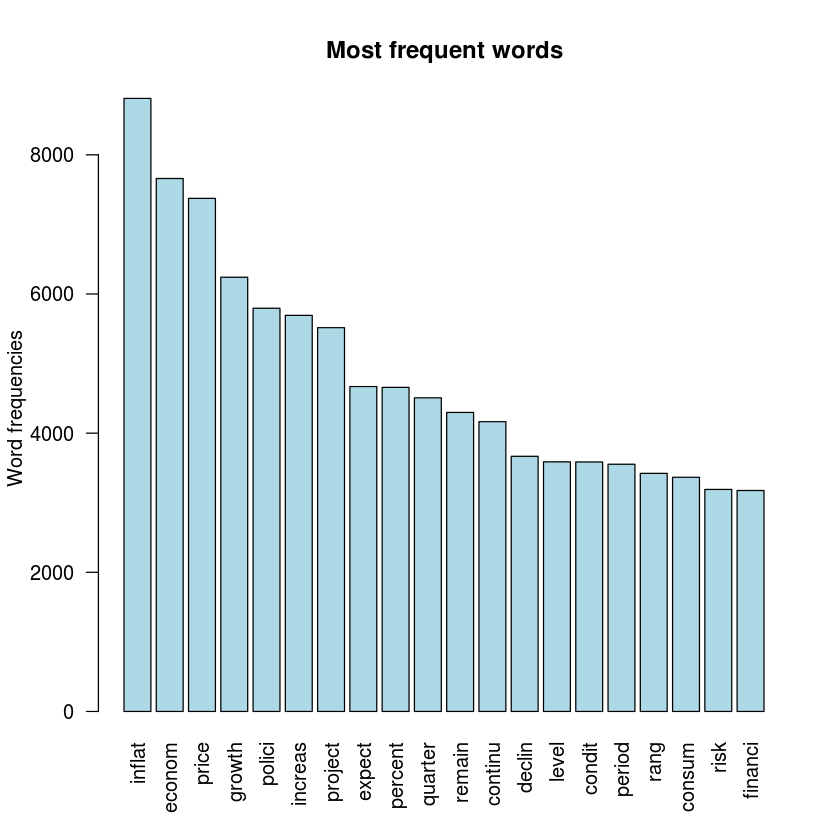

In [11]:
  #bar plot:
#   saveFileAs<- paste("wordFreq_barplot", i, sep="_")
#   setwd('/home/harish/PycharmProjects/Topic-Modeling/pictures')
#   png(filename = saveFileAs)
  barplot(d[1:20,]$freq, las = 2, names.arg = d[1:20,]$word,
          col ="lightblue", main ="Most frequent words",
          ylab = "Word frequencies")
#   dev.off()



In [12]:
#   saveFileAs<- paste("wordcloud", i, sep="_")
#   png(filename = saveFileAs)
#   wordcloud(names(v), v, max.words=100, rot.per=0.15, random.order=F,colors=brewer.pal(8, "Dark2"))
#   dev.off()

In [13]:
head(d,30)

,word,freq
inflat,inflat,8811
econom,econom,7660
price,price,7374
growth,growth,6241
polici,polici,5795
increas,increas,5693
project,project,5516
expect,expect,4670
percent,percent,4658
quarter,quarter,4508


### Word Importance : TF-IDF

In [14]:
dtm_tfidf <- weightTfIdf(dtms) 
dtm_tfidf

<<DocumentTermMatrix (documents: 25, terms: 4752)>>
Non-/sparse entries: 29025/89775
Sparsity           : 76%
Maximal term length: 56
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

### Clustering:

In [15]:
matDTM<-as.matrix(dtms)
tfidf<-weightTfIdf(dtms)
tfidf# how does the sparsity increases compared to dtms?
sparse<-removeSparseTerms(tfidf,0.995)
s<-as.matrix(sparse); dim(s)

<<DocumentTermMatrix (documents: 25, terms: 4752)>>
Non-/sparse entries: 29025/89775
Sparsity           : 76%
Maximal term length: 56
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

[1]   25 4243

##### Optimal clustmer number

In [16]:
#clustering
set.seed(123)
res<-NbClust(data=s, min.nc = 2, max.nc = 20, distance="euclidean", method="kmeans", index="silhouette")
f<-fviz_nbclust(s,kmeans,method="silhouette")
res$Best.nc
#saving
# png('optimalCluster2.png')
# f
# dev.off()
# res


Number_clusters     Value_Index 
        20.0000          0.6483

## NOTE: There are two optimum which are closer, check out  cluster number = 6

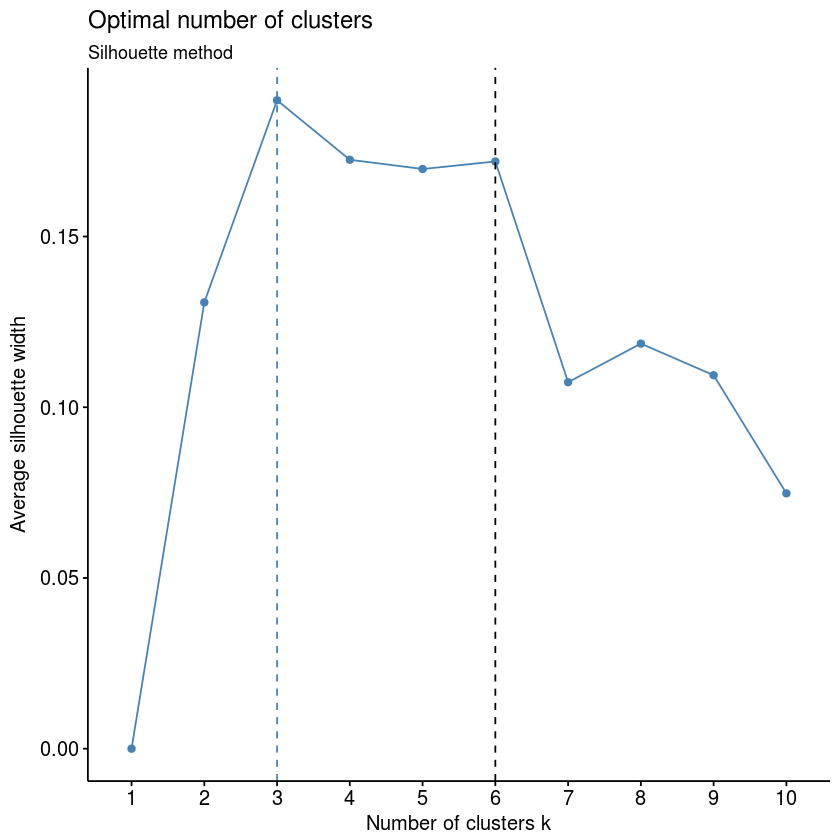

In [17]:
f+geom_vline(xintercept = 6, linetype = 2)+labs(subtitle = "Silhouette method")

In [18]:
png("elbow cluster.png")
fviz_nbclust(s, kmeans, method = "wss") +
geom_vline(xintercept = 6, linetype = 2)+
labs(subtitle = "Elbow method")
dev.off()

png 
  2

In [19]:
png("Silhouette.png")
fviz_nbclust(s, kmeans, method = "silhouette")+labs(subtitle = "Silhouette method")
# plot(prcomp(dtms)$x,col=cl_3$cluster)
dev.off()

png 
  2

# Kmeans

prcomp: 

Performs a principal components analysis on the given data matrix and returns the results as an object of class prcomp.

The calculation is done by a singular value decomposition of the (centered and possibly scaled) data matrix, not by using eigen on the covariance matrix. This is generally the preferred method for numerical accuracy.

In [20]:
#--------------------------------kmeans------------------------
set.seed(123)
# clus<-kmeans(s,3)

#wordcloud
m <- as.matrix(tfidf)
rownames(m) <- 1:nrow(m)

norm_eucl<- function(m)m/apply(m,MARGIN=1, FUN=function(x)sum(x^2)^.5)#Normalization first
m_norm<-norm_eucl(m)

cl_3<-kmeans(m_norm,3)
table(cl_3$cluster)
png("kmeansCluster_3.png")
plot(prcomp(m_norm)$x, col=cl_3$cl)
dev.off()


 1  2  3 
 6 10  9 

png 
  2

In [21]:
cl_3$tot.withinss

[1] 13.72281

### Three clusters: *however we have topics more than 4?* Lets check with 6

In [22]:
#cluster numbers = 6
m_norm<-norm_eucl(m)
cl_6<-kmeans(m_norm,6)
table(cl_6$cluster)
png("kmeansCluster_6.png")
plot(prcomp(m_norm)$x, col=cl_6$cl)
dev.off()


1 2 3 4 5 6 
3 4 6 5 3 4 

png 
  2

### Which one to choose?

There are 3 SSE- based measures that we consider: total withinSSE, betweenSSE and total SSE.
The actual values of those measure are difficult to interpret. We will be looking at the ratio
withinSSE/totalSSE. Total withinSSE shows how coherent (tight) are the clusters. The betweenSSE
shows how well the clusters are separated. The total SSE is the sum. A good clustering has tight
clusters that are well separated. So, we would like ratio withinSSE/totalSSE to be small. As we
experiment with different representations, we should compare that ratio to see what representation
gives better clustering

In [23]:
SSE_3<-100-(cl_3$tot.withinss/cl_3$totss)*100
SSE_3
SSE_6<-100-(cl_6$tot.withinss/cl_6$totss)*100
SSE_6

[1] 30.74793

[1] 46.3386

## LDA:

In [24]:
# svs = sort.list(abs(svd(dtms)$v[,4]), decreasing = TRUE)
# dtms$dimnames$Terms[head(svs, 6)]

In [25]:

##return top words by concept

##first create function to return top words; require dtms
concept<-function(num){ 
  sv<-sort.list((svd(dtms))$v[,num],decreasing = FALSE)
  # print(sv)
  # print(dtms$dimnames)
  dm<-dtms$dimnames$Terms[head(sv,5)] 
  return(dm)
}

In [26]:
##how many words?
num <- num_docs
i <- 1:num
val <- sapply(i, concept)

In [27]:
val

inflat,growth,committe,inflat,pace,chang,increas,purchas,purchas,market,⋯,rate,market,polici,action,inventori,increas,expans,remain,substanti,busi
econom,price,labor,price,labor,project,growth,financi,labor,demand,⋯,term,domest,increas,lower,price,firm,slow,sale,relat,sector
price,quarter,polici,energi,purchas,uncertainti,pace,asset,product,labor,⋯,commerci,import,continu,indic,continu,activ,gain,inflat,risk,anticip
project,expans,rang,core,inflat,pace,price,hous,pace,rise,⋯,interest,improv,larg,fund,activ,action,treasuri,hurrican,overal,domest
polici,busi,percent,expect,price,accommod,moder,risk,rise,price,⋯,accommod,chang,inventori,domest,chang,percent,consist,time,effect,rnrn


In [28]:
# library(ggplot2)
# ii <- 2000:2011
# ss <- rnorm(12,0,1)
# pm <- data.frame(ii,ss)
# tmpplot <- ggplot(pm, aes(x = ii, y = ss))
# plot <- tmpplot + geom_line() + scale_x_continuous(breaks=seq(2000,2011, 0.5))
# plot 

In [29]:
#Set parameters for Gibbs sampling
burnin = 4000
iter = 2000
thin = 500
seed = list(2003,5,63,100001,765)
nstart = 5
best = TRUE

#Number of topics
k = 3

In [30]:
# write.table(val,file=paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), append = T)
# ldaGibbs5@gamma

In [31]:
# ##how many words?
# num <- 5
# i <- 1:num
# sapply(i, concept)
# # https://stackoverflow.com/questions/14875493/lda-with-topicmodels-how-can-i-see-which-topics-different-documents-belong-to


In [32]:
# k=5
# ldaGibbs5 <-LDA(dtms, k, method = "Gibbs") 
# #docs to topics 
# ldaGibbs5.topics <- as.matrix(topics(ldaGibbs5))
# #get probability of each topic in each doc
# topicProbabilities <- as.data.frame(ldaGibbs5@gamma)

In [33]:
# topicProbabilities
# nrow(ldaGibbs5@gamma)

In [34]:
# vector <- NULL
# for(i in 1:nrow(ldaGibbs5@gamma)) {
#   vector <- c(vector, ldaGibbs5@gamma[i,])
# }


# Concepts <- rep(c("Concept 1","Concept 2","Concept 3", "Concept 4","Concept 5"),times=102)#why 80?
# TimeByDocs <- as.numeric(rep(1:102,each=5))
# chartdata <- data.frame(Concepts,TimeByDocs,vector)
# myplot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()


In [35]:
# ggsave(filename="myPlot.png", plot=myplot)

In [36]:
# l<-c()
# i <- 0
# for (j in 1993:2005){
#    l[i] <- j
#     i <- i + 1
# }

In [38]:
##how many words?
# for (k in 2:5){
k = 4
#     num <- num_docs
#     i <- 1:num
#     val <- sapply(i, concept)
    # https://stackoverflow.com/questions/14875493/lda-with-topicmodels-how-can-i-see-which-topics-different-documents-belong-to
    

    ldaGibbs_k <-LDA(dtms, k, method = "Gibbs")
    #docs to topics 
#     ldaGibbs_k.topics <- as.matrix(topics(ldaGibbs_k))
#     #get probability of each topic in each doc
#     topicProbabilities <- as.data.frame(ldaGibbs_k@gamma)
# write.table(val,file=paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), append = T)

    vector <- NULL
    for(i in 1:nrow(ldaGibbs_k@gamma)) {
      vector <- c(vector, ldaGibbs_k@gamma[i,])
    }


    Concepts <- rep(c("Concept 1","Concept 2","Concept 3","Concept 4"),times=num_docs)
#     TimeByDocs <- as.numeric(rep(c("1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004",
#                                    "2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"),each=k))
    
TimeByDocs <- as.numeric(rep(1993:2017,each=k))
chartdata <- data.frame(Concepts,TimeByDocs,vector)
    myplot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()
    plotname <- paste(k,"png", sep=".");
    ggsave(filename=plotname, plot=myplot)
    
# }

Saving 6.67 x 6.67 in image


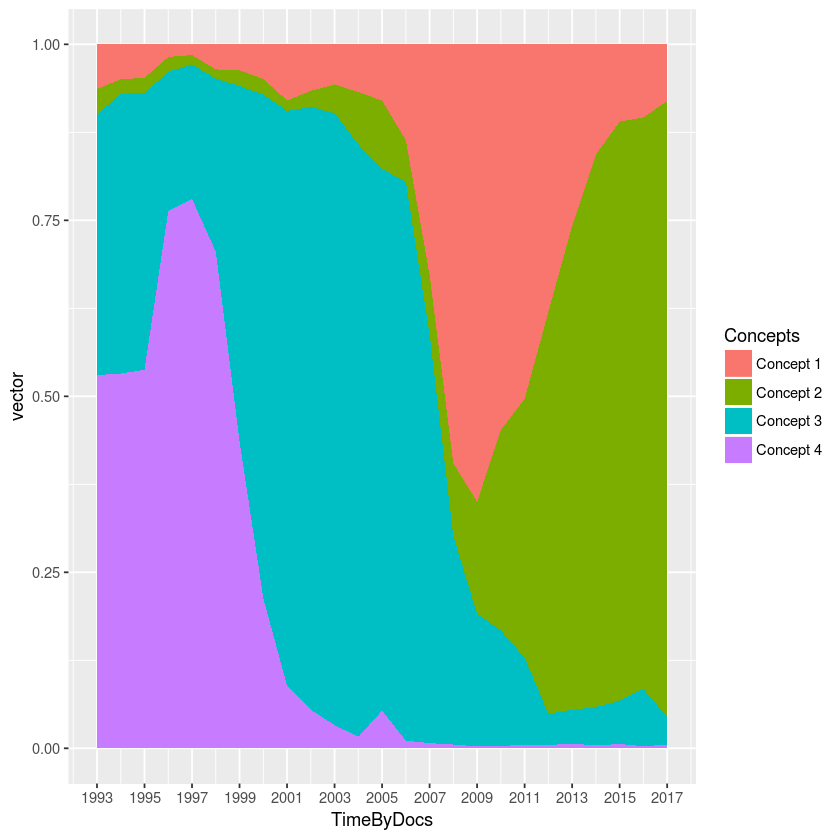

In [39]:
ii <- 1993:2017

TimeByDocs <- as.numeric(rep(1993:2017,each=k))
plot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area() + scale_x_continuous(breaks=seq(1993,2017, 2))
plot 

In [40]:
# Concepts <- rep(c("Concept 1","Concept 2","Concept 3", "Concept 4","Concept 5"),times=102)#why 80?
#     TimeByDocs <- as.numeric(rep(c("1993","1994","1995","1996","1997","1998","1999",
#                                    "2000","2001","2002","2003","2004","2005"),each=k))
#     chartdata <- data.frame(Concepts,TimeByDocs,vector)
#     myplot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()
# myplot

In [41]:

write.table(topicProbabilities,file=paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), append = T)

ERROR: Error in is.data.frame(x): object 'topicProbabilities' not found


In [ ]:
ldaGibbs_k@gamma[1:10,]


In [ ]:
ldaGibbs_k@beta

In [ ]:
# dtms$dimnames$Terms

In [ ]:
lda.terms <- as.matrix(terms(ldaGibbs_k, 10))
lda.terms

In [ ]:
length(terms(ldaGibbs_k, 2000)[,1])# First column how many terms in topic; 1858 not 2000

# LSA

In [ ]:
#LSA
reduce <-function(A,dim) {
#Calculates the SVD
single_val_d <-svd(A) #Approximate each result of SVD with the given dimension
u<-as.matrix(single_val_d$u[, 1:dim])
v<-as.matrix(single_val_d$v[, 1:dim])
d<-as.matrix(diag(single_val_d$d)[1:dim, 1:dim])

#Create the new approximated matrix
return(as.matrix(u%*%d%*%t(v),type='blue'))
}
#50
reduce_50 <-reduce(dtms,50)

In [ ]:
sing <-svd(dtms)
diag(sing$d)[1:6,]

In [ ]:
sv = sort.list(abs(sing$v[,6]), decreasing = TRUE)
dtms$dimnames$Terms[head(sv, 5)]

In [ ]:
ldaGibbs_k

## Visualization

In [79]:
library(stringr)
library(text2vec)



Attaching package: ‘text2vec’

The following object is masked from ‘package:topicmodels’:

    perplexity



In [83]:
#LSA:
lsa = LSA$new(n_topics = 3)

In [85]:
lsa$fit_transform()

ERROR: Error in super$check_convert_input(x, private$internal_matrix_formats): don't know how to deal with input of class 'DocumentTermMatrix | simple_triplet_matrix'


In [ ]:
lsa$transform(dtm)


In [ ]:
lsa$components

#### Creating Latent space:
https://www.rdocumentation.org/packages/lsa/versions/0.73.1/topics/lsa

In [ ]:
# create some files
td = tempfile()
dir.create(td)
write( c("dog", "cat", "mouse"), file=paste(td, "D1", sep="/") )
write( c("ham", "mouse", "sushi"), file=paste(td, "D2", sep="/") )
write( c("dog", "pet", "pet"), file=paste(td, "D3", sep="/") )

# LSA
data(stopwords_en)
myMatrix = textmatrix(td, stopwords=stopwords_en)
myMatrix = lw_logtf(myMatrix) * gw_idf(myMatrix)
myLSAspace = lsa(myMatrix, dims=dimcalc_share())
as.textmatrix(myLSAspace)


In [ ]:
### Vector mapping:
words_to_remove_in_article<-c("system","reserve","tthe","rnthe","participants", "continue", "open","committee", "federal", "also", "meeting", "FOMC", "\r","\t","Present", "\n", 'year') #irrevalant words

#buildt dtm
lsatextmatrix <- textmatrix(mydir = folder, stemming = TRUE, language = "english", minWordLength = 4,
                            minDocFreq = 2, stopwords = words_to_remove_in_article, removeNumbers = TRUE)

# folder_i <-"/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/speeches/brainard.pdf"

# #build other dtm
# lsatextmatrix2003 <- textmatrix(mydir = folder_i, vocabulary = rownames(lsatextmatrix))

# #perform lsa
# lsa2002 <- lsa(lsatextmatrix)


# ##fold in
# lsa2003folded <- fold_in(lsatextmatrix2003 ,lsa2002)

In [ ]:
lsatextmatrix

# Lexicon based progress over year

In [ ]:
lsa

# Document Sim

In [241]:
folder_i <-"/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/FullDataset/"


In [242]:
 text_dtm <- textmatrix(mydir = folder_i, stemming = TRUE, language = "english", minWordLength = 4,
                              minDocFreq = 1,stopwords = words_to_remove_in_article, removeNumbers = TRUE)
  
  ##dimcalc_share is a method to find best number of concepts; use this or do another analysis?
  myLSAspace <- lsa(text_dtm, dims = dimcalc_share())
dimcalc_share()(myLSAspace$sk)

[1] 2

In [243]:
dimcalc_share()(myLSAspace$sk)#concepts of lsa based on eigen values

[1] 2

In [244]:
myLSAspace$sk#eigen values

[1] 2892.1066 2219.1585  742.1020  387.1419  341.3248  305.7754  231.0555
 [8]  223.1912  206.6111  191.5210  176.1590  174.7307  160.2465  157.8970
[15]  138.8137  133.4911  132.9849  128.2807  126.9649

In [136]:
# help(lsa)
# text_lsa_decomp$sk

In [190]:
# as.textmatrix(myLSAspace)

In [246]:
#2017 speeches
folder_minutes <- "/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/pdftotext_2017speech/"
  
  #build other dtm
  speech_dtm <- textmatrix(mydir = folder_minutes, vocabulary = rownames(text_dtm))

##fold in
  lsa_folded <- fold_in(speech_dtm,myLSAspace)

In [247]:
# help(lsa_folded)
# plot(lsa_folded)

In [248]:
summary(lsa_folded)

                vocabulary                  documents 
                     11237                          9 
             freqs not '0'            max term length 
                     30108                        249 
non-alphanumerics in terms 
                      6803 
attr(,"class")
[1] "summary.textmatrix"

In [249]:
dim(lsa_folded)

[1] 11237     9

In [250]:
# similarity among speakers with their speech alone
corr_speech <- cosine(speech_dtm)
corr_speech

,brainard.txt,dudley.txt,evans.txt,fischer.txt,harker.txt,kaplan.txt,Kashkari.txt,powell.txt,yellen.txt
brainard.txt,1.0000000,0.6043179,0.6951372,0.4905119,0.6963348,0.6832839,0.6075810,0.6701767,0.7691029
dudley.txt,0.6043179,1.0000000,0.7462444,0.6146830,0.7692043,0.7132616,0.6855168,0.8312445,0.7333257
evans.txt,0.6951372,0.7462444,1.0000000,0.6038162,0.7674904,0.7888460,0.6025521,0.8190581,0.8764073
fischer.txt,0.4905119,0.6146830,0.6038162,1.0000000,0.5751133,0.5867669,0.5005156,0.5984797,0.6145501
harker.txt,0.6963348,0.7692043,0.7674904,0.5751133,1.0000000,0.7111146,0.7169113,0.7311835,0.7404572
kaplan.txt,0.6832839,0.7132616,0.7888460,0.5867669,0.7111146,1.0000000,0.6398382,0.7056747,0.7976523
Kashkari.txt,0.6075810,0.6855168,0.6025521,0.5005156,0.7169113,0.6398382,1.0000000,0.5519205,0.6203946
powell.txt,0.6701767,0.8312445,0.8190581,0.5984797,0.7311835,0.7056747,0.5519205,1.0000000,0.8138736
yellen.txt,0.7691029,0.7333257,0.8764073,0.6145501,0.7404572,0.7976523,0.6203946,0.8138736,1.0000000


In [251]:
corr_lsaSpeech <- cosine(lsa_folded)# almost all are similar to each other for the given 2017 miunutes data
corr_lsaSpeech

,brainard.txt,dudley.txt,evans.txt,fischer.txt,harker.txt,kaplan.txt,Kashkari.txt,powell.txt,yellen.txt
brainard.txt,1.0000000,0.9189151,0.9619748,0.8827136,0.9674164,0.9146716,0.8826319,0.9332419,0.9431430
dudley.txt,0.9189151,1.0000000,0.9456656,0.9357663,0.9689642,0.9166537,0.9537709,0.9764647,0.9361457
evans.txt,0.9619748,0.9456656,1.0000000,0.9363361,0.9611033,0.9679351,0.8941344,0.9768090,0.9908838
fischer.txt,0.8827136,0.9357663,0.9363361,1.0000000,0.9308726,0.9321068,0.9082748,0.9444067,0.9461500
harker.txt,0.9674164,0.9689642,0.9611033,0.9308726,1.0000000,0.9475532,0.9588178,0.9483520,0.9486585
kaplan.txt,0.9146716,0.9166537,0.9679351,0.9321068,0.9475532,1.0000000,0.8874003,0.9277758,0.9644888
Kashkari.txt,0.8826319,0.9537709,0.8941344,0.9082748,0.9588178,0.8874003,1.0000000,0.8998820,0.8902619
powell.txt,0.9332419,0.9764647,0.9768090,0.9444067,0.9483520,0.9277758,0.8998820,1.0000000,0.9695497
yellen.txt,0.9431430,0.9361457,0.9908838,0.9461500,0.9486585,0.9644888,0.8902619,0.9695497,1.0000000


In [232]:

folder_minutes <- "/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/correlation/"
  
  #build other dtm
  corr_dtm <- textmatrix(mydir = folder_minutes, vocabulary = rownames(text_dtm))
corr_2017<- cosine(corr_dtm)


In [235]:
# corrplot(corr_2017, type = "upper", order = "hclust", 
#          tl.col = "black", tl.srt = 45)
png("corr_2017.png")
corrplot(corr_2017, method = "number")
dev.off()

png 
  2

corrplot 0.84 loaded


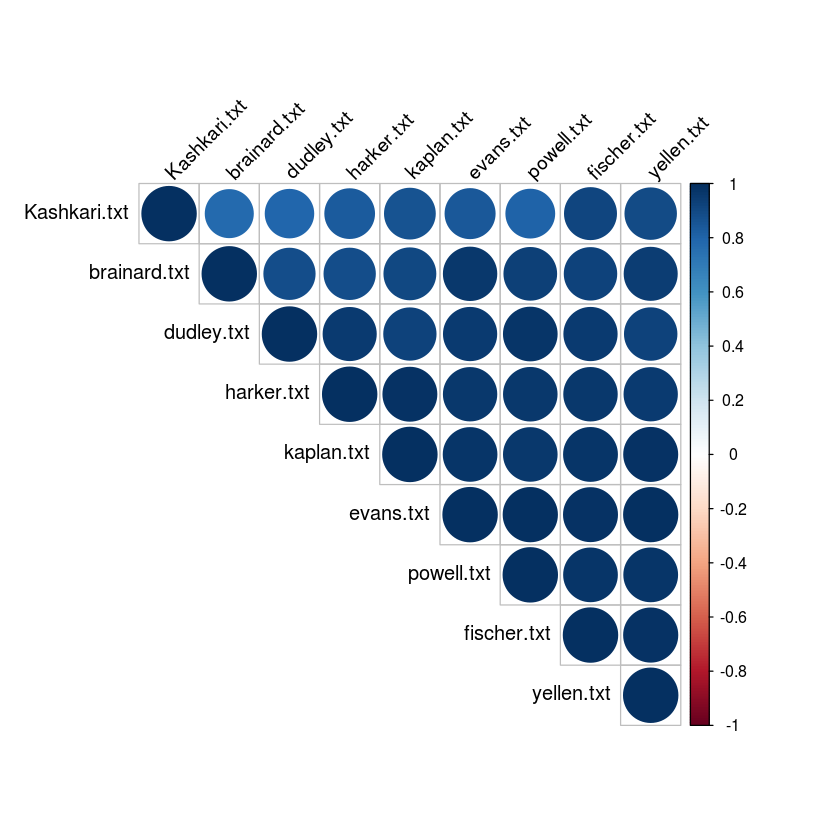

In [209]:
library(corrplot)
corrplot(corr, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [187]:
g <- ggplot(corr_df, aes(x=names,y=corr)) 
  g + geom_bar(stat="identity", width = 0.5, fill="tomato2") + 
    labs(title="Bar Chart", 
         subtitle="Correlation of Speeches And Minutes") +
    theme(axis.text.x = element_text(angle=65, vjust=0.6)) + geom_area()

Don't know how to automatically pick scale for object of type function. Defaulting to continuous.
ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (6): x, y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(e

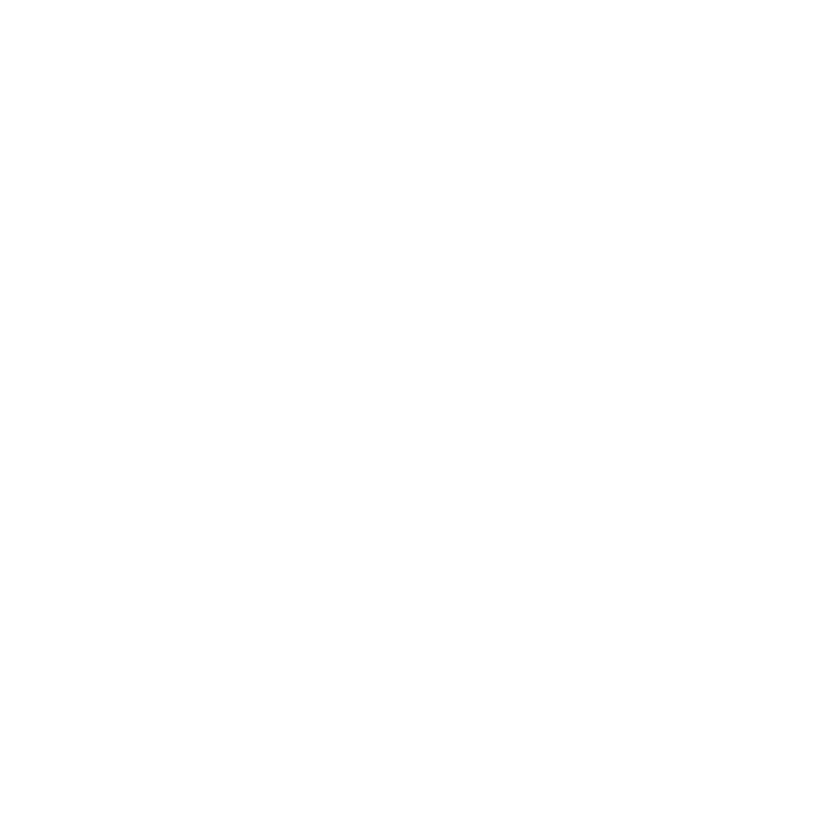

In [188]:
g

In [172]:
findAssocs(dtms, 'growth', 0.70)#word association

$growth
  moder develop 
   0.80    0.79

In [178]:
help(hclust)

<<DocumentTermMatrix (documents: 25, terms: 4752)>>
Non-/sparse entries: 41750/77050
Sparsity           : 65%
Maximal term length: 56
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs econom expect growth increas inflat percent polici price project quarter
  16    426    242    312     272    518     207    222   501     369     248
  17    432    272    206     281    454     254    187   362     427     233
  18    459    267    242     292    503     222    219   353     382     210
  19    532    325    244     331    625     230    352   476     451     220
  20    611    295    285     307    595     403    479   366     571     213
  21    527    274    274     308    548     401    511   294     472     160
  22    513    325    304     289    720     457    442   313     503     215
  23    548    351    295     321    831     488    462   507     500     209
  24    614    413    372     388    785     507    418   479     589     231
  25    436   

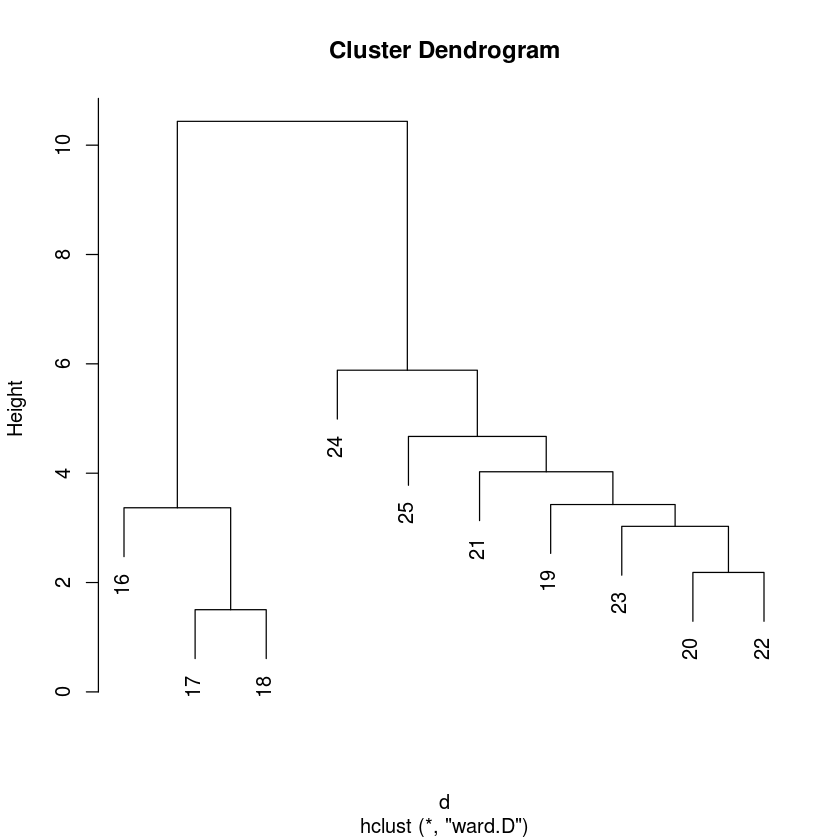

In [177]:
my.df <- as.data.frame(inspect(dtms))
my.df.scale <- scale(my.df)
d <- dist(my.df.scale,method="euclidean")
fit <- hclust(d, method="ward.D")
# plot(fit)